# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

Species, Island, and Sex would need to by dummified.

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, ggtitle

penguins = load_penguins()
penguins.head()

#dummify species island and sex
penguins_encoded = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

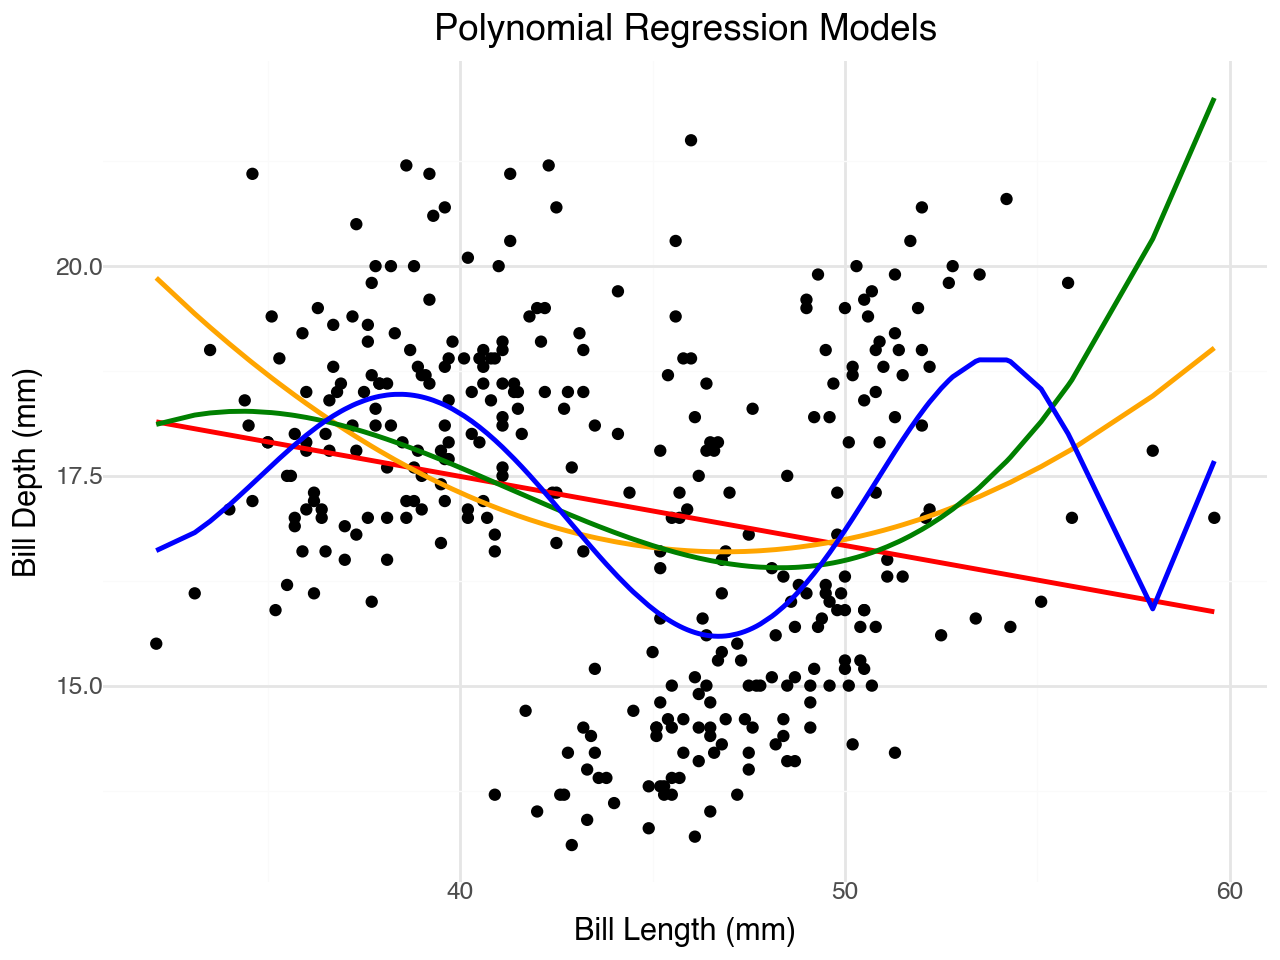

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


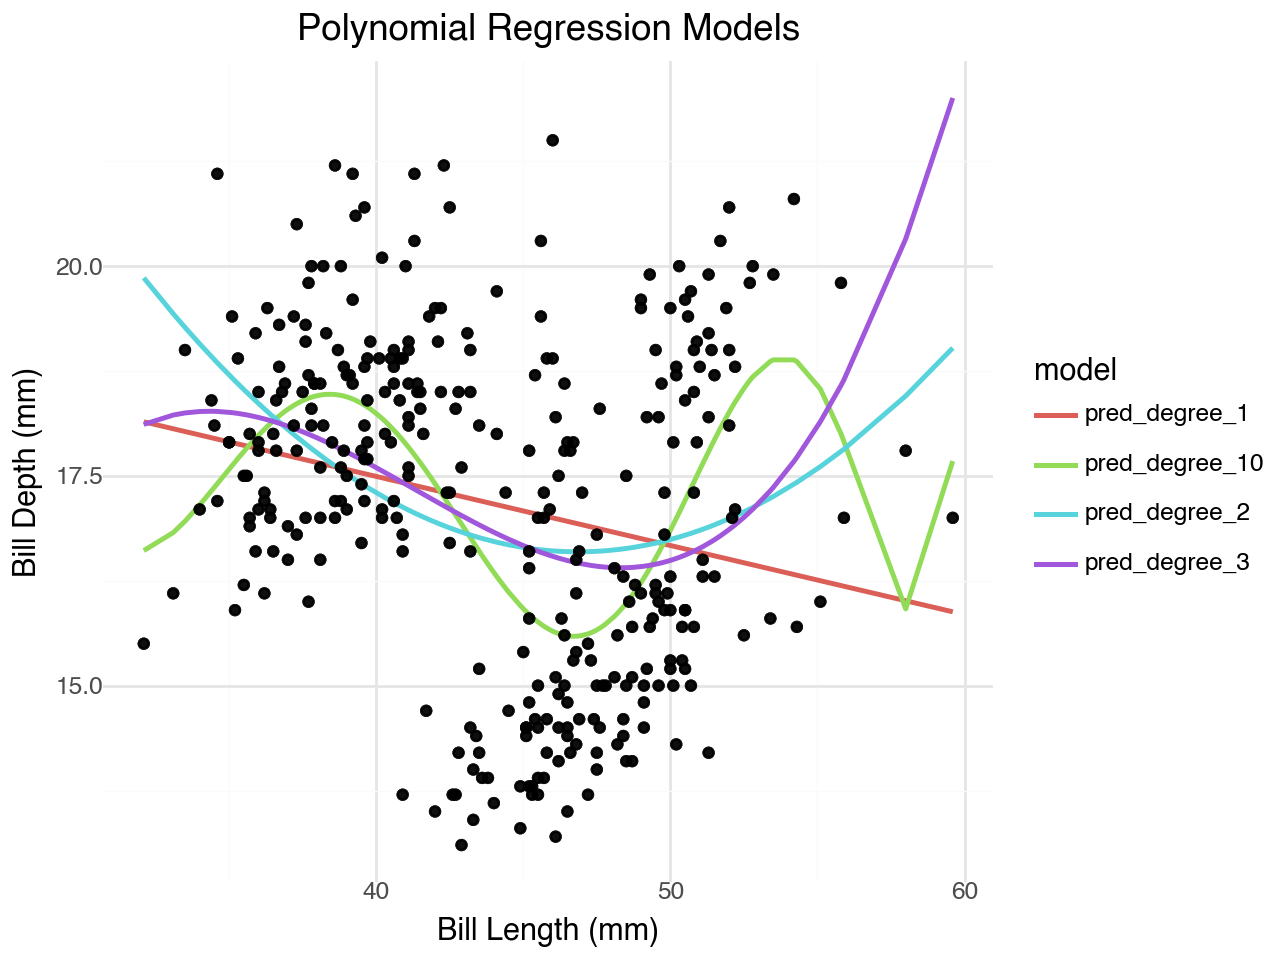

In [25]:
#drop missing values
penguins_encoded = penguins.dropna()

#predictor and response variables
X = penguins_encoded[['bill_length_mm']]
y = penguins_encoded['bill_depth_mm']

#create polynomial features
degrees = [1, 2, 3, 10]
predictions = {}

#create dataframe
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    #create polynomial features
    X_poly = poly.fit_transform(X)
    #linear regression revenue
    model = LinearRegression()
    #fit the polynomial model
    model.fit(X_poly, y)
    #store predictions
    predictions[degree] = model.predict(X_poly)

#prepare dataframe for plotting
plot_data = pd.DataFrame({
    'bill_length_mm': X['bill_length_mm'],
    'bill_depth_mm': y,
})

# add predictions to dataframe
for degree in degrees:
    plot_data[f'pred_degree_{degree}'] = predictions[degree]

#scatterplot
(ggplot(plot_data, aes(x='bill_length_mm')) +
     geom_point(aes(y='bill_depth_mm'), color='black') +
     geom_line(aes(y='pred_degree_1'), color='red', size=1) + 
     geom_line(aes(y='pred_degree_2'), color='orange', size=1) +
     geom_line(aes(y='pred_degree_3'), color='green', size=1) + 
     geom_line(aes(y='pred_degree_10'), color='blue', size=1) +
     labs(title='Polynomial Regression Models',
          x='Bill Length (mm)',
          y='Bill Depth (mm)') +
     theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

None of the models are a particularly good fit for the data. The linear regression model could be an underfit because the points are clustered in roughly three areas (likely due to the different species), but it is difficult to fit a single line that captures the variation between groups. The degree 10 polynomial model is definitely overfitting the data. You can tell that it is overcompensating for the variations between the points and ultimately does not really follow the structure of the points available. The third degree polynomial appears to fit the data the best considering the larger amount of points around 50 mm Bill Length (although they have a large vertical spread). The second degree polynomial reaches its minimum on the graph in a spot that is lacking points due to the three rough clusters of penguin observations.